Project 1- Airbnb Analysis

In [171]:
#Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import json
from pprint import pprint
from scipy.stats import linregress
import numpy as np

In [144]:
#Import csv file

df = pd.read_csv("Resources/listings.csv")
master_df = pd.DataFrame(df)
master_df = master_df.loc[df['number_of_reviews']>1,:]
master_df = master_df[master_df["review_scores_rating"].notnull()]

In [145]:
master_df.count()

id                                  4081
listing_url                         4081
scrape_id                           4081
last_scraped                        4081
name                                4081
summary                             4043
space                               3445
description                         4066
experiences_offered                 4081
neighborhood_overview               3238
notes                               2729
transit                             3220
access                              3303
interaction                         3241
house_rules                         3161
thumbnail_url                          0
medium_url                             0
picture_url                         4081
xl_picture_url                         0
host_id                             4081
host_url                            4081
host_name                           4081
host_since                          4081
host_location                       4074
host_about      

In [146]:
amenities_df = master_df.loc[:,["id","amenities","review_scores_rating"]]
amenities_df.head()

,id,amenities,review_scores_rating
0,360,"{TV,Wifi,""Air conditioning"",Kitchen,""Free stre...",100.0
1,590,"{Internet,Wifi,""Air conditioning"",Kitchen,""Fre...",96.0
2,592,"{Internet,Wifi,""Air conditioning"",Kitchen,""Fre...",97.0
3,686,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",95.0
4,1940,"{TV,Wifi,""Air conditioning"",Kitchen,""Pets live...",99.0


In [147]:
amenities_df["review_scores_rating"].value_counts()

100.0    1135
98.0      602
99.0      595
97.0      416
96.0      304
95.0      262
93.0      158
94.0      147
90.0      107
92.0       86
91.0       56
89.0       37
87.0       35
80.0       29
88.0       26
86.0       15
84.0       14
83.0       13
85.0        9
73.0        5
70.0        5
60.0        4
82.0        4
75.0        4
67.0        3
78.0        3
81.0        2
50.0        2
79.0        1
47.0        1
77.0        1
Name: review_scores_rating, dtype: int64

In [148]:
amenities_df.count()

id                      4081
amenities               4081
review_scores_rating    4081
dtype: int64

In [149]:
amenities_df.iloc[0,1]

'{TV,Wifi,"Air conditioning",Kitchen,"Free street parking","Hot tub",Heating,"Smoke detector","Carbon monoxide detector","First aid kit","Fire extinguisher",Essentials,Shampoo,"Lock on bedroom door",Hangers,"Hair dryer",Iron,"Laptop friendly workspace","Self check-in",Keypad,Bathtub,"Hot water","Coffee maker",Refrigerator,"Dishes and silverware","Cooking basics",Oven,Stove,"BBQ grill","Patio or balcony","Garden or backyard","Luggage dropoff allowed","Long term stays allowed","Well-lit path to entrance"}'

In [150]:
amenities = [amenities for amenities in amenities_df["amenities"]]
amenities[0]

'{TV,Wifi,"Air conditioning",Kitchen,"Free street parking","Hot tub",Heating,"Smoke detector","Carbon monoxide detector","First aid kit","Fire extinguisher",Essentials,Shampoo,"Lock on bedroom door",Hangers,"Hair dryer",Iron,"Laptop friendly workspace","Self check-in",Keypad,Bathtub,"Hot water","Coffee maker",Refrigerator,"Dishes and silverware","Cooking basics",Oven,Stove,"BBQ grill","Patio or balcony","Garden or backyard","Luggage dropoff allowed","Long term stays allowed","Well-lit path to entrance"}'

In [151]:
#cleanse amenities lists into a list of lists
for counter, amenity_list in enumerate(amenities,start=0):
    amenity_list_new = amenity_list.replace('{','')
    amenity_list_new = amenity_list_new.replace('}','')
    amenity_list_new = amenity_list_new.replace('"','')
    amenity_list_new = amenity_list_new.split(',')
    amenities[counter] = amenity_list_new
print(amenities)

[['TV', 'Wifi', 'Air conditioning', 'Kitchen', 'Free street parking', 'Hot tub', 'Heating', 'Smoke detector', 'Carbon monoxide detector', 'First aid kit', 'Fire extinguisher', 'Essentials', 'Shampoo', 'Lock on bedroom door', 'Hangers', 'Hair dryer', 'Iron', 'Laptop friendly workspace', 'Self check-in', 'Keypad', 'Bathtub', 'Hot water', 'Coffee maker', 'Refrigerator', 'Dishes and silverware', 'Cooking basics', 'Oven', 'Stove', 'BBQ grill', 'Patio or balcony', 'Garden or backyard', 'Luggage dropoff allowed', 'Long term stays allowed', 'Well-lit path to entrance'], ['Internet', 'Wifi', 'Air conditioning', 'Kitchen', 'Free parking on premises', 'Breakfast', 'Free street parking', 'Indoor fireplace', 'Heating', 'Family/kid friendly', 'Washer', 'Dryer', 'Smoke detector', 'Carbon monoxide detector', 'First aid kit', 'Fire extinguisher', 'Essentials', 'Shampoo', 'Hangers', 'Hair dryer', 'Iron', 'Laptop friendly workspace', 'Microwave', 'Coffee maker', 'Refrigerator', 'Dishwasher', 'Dishes and 

In [152]:
count_of_amenities = [len(amenity_list) for amenity_list in amenities]
print(count_of_amenities)

[34, 33, 19, 27, 43, 27, 31, 43, 25, 39, 37, 38, 33, 25, 37, 26, 21, 18, 18, 11, 36, 49, 22, 29, 18, 46, 36, 19, 32, 30, 27, 29, 26, 28, 7, 22, 5, 25, 26, 22, 22, 20, 30, 24, 43, 13, 48, 34, 50, 24, 25, 36, 27, 38, 22, 23, 39, 36, 42, 46, 44, 42, 50, 31, 48, 23, 27, 31, 39, 11, 37, 28, 28, 47, 23, 24, 25, 26, 13, 12, 13, 13, 24, 18, 28, 22, 19, 27, 23, 32, 39, 13, 12, 24, 27, 22, 28, 26, 23, 25, 27, 25, 25, 28, 27, 23, 9, 25, 17, 26, 28, 26, 29, 40, 16, 28, 27, 25, 46, 33, 28, 29, 27, 53, 15, 19, 30, 45, 14, 22, 20, 23, 35, 47, 13, 14, 41, 21, 26, 19, 26, 19, 18, 21, 24, 35, 40, 28, 44, 13, 18, 34, 35, 21, 23, 17, 17, 40, 40, 18, 35, 36, 48, 25, 21, 34, 46, 22, 26, 27, 28, 36, 37, 37, 42, 35, 30, 9, 42, 54, 37, 18, 36, 46, 14, 35, 28, 46, 26, 35, 30, 30, 23, 26, 27, 32, 16, 37, 31, 37, 31, 38, 42, 30, 19, 28, 15, 41, 20, 28, 18, 23, 36, 16, 45, 13, 32, 25, 11, 24, 26, 38, 19, 23, 13, 15, 51, 46, 23, 40, 49, 32, 23, 29, 30, 25, 29, 26, 51, 45, 23, 26, 46, 24, 20, 32, 24, 19, 35, 49, 15,

In [153]:
amenities_df["amenities"] = amenities
amenities_df["count of amenities"] = count_of_amenities
amenities_df.head()

,id,amenities,review_scores_rating,count of amenities
0,360,"[TV, Wifi, Air conditioning, Kitchen, Free str...",100.0,34
1,590,"[Internet, Wifi, Air conditioning, Kitchen, Fr...",96.0,33
2,592,"[Internet, Wifi, Air conditioning, Kitchen, Fr...",97.0,19
3,686,"[TV, Cable TV, Internet, Wifi, Air conditionin...",95.0,27
4,1940,"[TV, Wifi, Air conditioning, Kitchen, Pets liv...",99.0,43


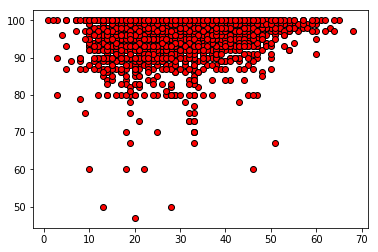

In [154]:
plt.scatter(amenities_df["count of amenities"],amenities_df["review_scores_rating"],marker="o",facecolors="red",edgecolors="black")

In [155]:
from scipy.stats import linregress

(slope, intercept, r_value, p_value, std_error) = linregress(amenities_df["count of amenities"], amenities_df["review_scores_rating"])
fit = slope * amenities_df["count of amenities"] + intercept
print(r_value**2)

0.011351849693705826


In [156]:
amenity_count_groups = amenities_df.groupby(["count of amenities"])
properties_with_amenity_count = amenity_count_groups["id"].count()
average_score_by_amenity_count = amenity_count_groups["review_scores_rating"].mean()
count_rating_summary = pd.DataFrame({"Number of Properties":properties_with_amenity_count,
                                     "Average Review Score":average_score_by_amenity_count})
count_rating_summary.reset_index(inplace=True)
count_rating_summary.head()

,count of amenities,Number of Properties,Average Review Score
0,1,1,100.0
1,2,1,100.0
2,3,3,90.0
3,4,1,96.0
4,5,4,95.0


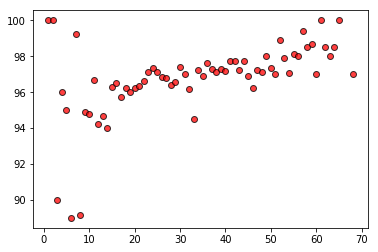

In [157]:
#no weighting of bubble size
plt.scatter(count_rating_summary["count of amenities"],count_rating_summary["Average Review Score"],marker="o",facecolors="red",edgecolors="black",alpha=.75)

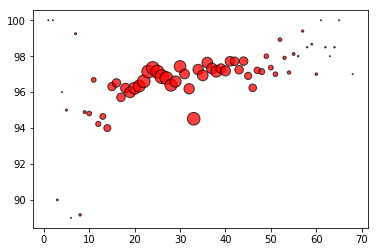

In [158]:
#bubble size weighted by number of properties
plt.scatter(count_rating_summary["count of amenities"],count_rating_summary["Average Review Score"],marker="o",facecolors="red",edgecolors="black",alpha=.75,s=count_rating_summary["Number of Properties"])

0.2883040226367375


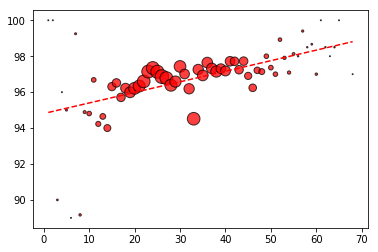

In [159]:
from scipy.stats import linregress

(slope, intercept, r_value, p_value, std_error) = linregress(count_rating_summary["count of amenities"], count_rating_summary["Average Review Score"])
fit = slope * count_rating_summary["count of amenities"] + intercept
print(r_value**2)

fig, ax = plt.subplots()

ax.scatter(count_rating_summary["count of amenities"],count_rating_summary["Average Review Score"],marker="o",facecolors="red",edgecolors="black",alpha=.75,s=count_rating_summary["Number of Properties"])
ax.plot(count_rating_summary["count of amenities"], fit, 'r--')

In [160]:
ratings = [rating for rating in amenities_df["review_scores_rating"]]
print(ratings)

[100.0, 96.0, 97.0, 95.0, 99.0, 95.0, 94.0, 97.0, 96.0, 98.0, 100.0, 98.0, 98.0, 96.0, 94.0, 98.0, 98.0, 99.0, 98.0, 94.0, 99.0, 99.0, 98.0, 94.0, 100.0, 99.0, 98.0, 95.0, 100.0, 100.0, 96.0, 99.0, 97.0, 97.0, 97.0, 97.0, 100.0, 96.0, 95.0, 92.0, 97.0, 100.0, 99.0, 97.0, 97.0, 99.0, 98.0, 95.0, 99.0, 98.0, 99.0, 99.0, 98.0, 98.0, 98.0, 99.0, 99.0, 98.0, 98.0, 98.0, 96.0, 99.0, 99.0, 96.0, 97.0, 96.0, 95.0, 99.0, 96.0, 97.0, 98.0, 98.0, 99.0, 96.0, 96.0, 94.0, 100.0, 92.0, 97.0, 92.0, 95.0, 93.0, 99.0, 87.0, 100.0, 97.0, 94.0, 96.0, 91.0, 84.0, 97.0, 94.0, 94.0, 93.0, 90.0, 96.0, 95.0, 93.0, 97.0, 90.0, 93.0, 80.0, 96.0, 100.0, 90.0, 100.0, 97.0, 100.0, 92.0, 94.0, 87.0, 100.0, 96.0, 98.0, 96.0, 100.0, 100.0, 95.0, 97.0, 93.0, 50.0, 97.0, 88.0, 99.0, 93.0, 100.0, 98.0, 99.0, 93.0, 93.0, 96.0, 100.0, 98.0, 100.0, 85.0, 90.0, 94.0, 91.0, 98.0, 95.0, 97.0, 100.0, 97.0, 97.0, 98.0, 98.0, 98.0, 99.0, 98.0, 95.0, 98.0, 98.0, 98.0, 82.0, 94.0, 97.0, 80.0, 99.0, 99.0, 92.0, 98.0, 97.0, 99.0, 10

In [161]:
unique_amenities = []
unique_amenity_count = []
total_amenity_rating = []

for counter,amenity_list in enumerate(amenities):
    for amenity in amenity_list:
        if amenity not in unique_amenities:
            unique_amenities.append(amenity)
            unique_amenity_count.append(1)
            total_amenity_rating.append(ratings[counter])
        else:
            unique_amenity_index = unique_amenities.index(amenity)
            unique_amenity_count[unique_amenity_index] += 1
            total_amenity_rating[unique_amenity_index] += ratings[counter]

print(len(unique_amenities))
print(len(unique_amenity_count))
print(len(total_amenity_rating))

122
122
122


In [162]:
specific_amenity_summary = pd.DataFrame({"Amenity":unique_amenities,
                                         "Properties With Amenity":unique_amenity_count,
                                         "Sum of Rating":total_amenity_rating})
specific_amenity_summary.head()

,Amenity,Properties With Amenity,Sum of Rating
0,TV,3571,345733.0
1,Wifi,4018,388821.0
2,Air conditioning,3324,322146.0
3,Kitchen,3756,363157.0
4,Free street parking,2317,225056.0


In [164]:
specific_amenity_summary["Average Rating"] = specific_amenity_summary["Sum of Rating"]/specific_amenity_summary["Properties With Amenity"]
specific_amenity_summary.head()

,Amenity,Properties With Amenity,Sum of Rating,Average Rating
0,TV,3571,345733.0,96.816858
1,Wifi,4018,388821.0,96.769786
2,Air conditioning,3324,322146.0,96.915162
3,Kitchen,3756,363157.0,96.687167
4,Free street parking,2317,225056.0,97.132499


In [165]:
specific_amenity_summary.describe()

,Properties With Amenity,Sum of Rating,Average Rating
count,122.000000,122.000000,122.000000
mean,992.745902,96174.704918,96.977993
std,1225.826842,118712.513842,0.886680
min,1.000000,99.000000,93.523810
25%,75.250000,7226.500000,96.716979
50%,380.000000,36591.500000,97.025692
75%,1624.500000,157792.250000,97.349076
max,4022.000000,389108.000000,99.333333


In [168]:
rare_amenities = specific_amenity_summary.loc[specific_amenity_summary["Properties With Amenity"] <5,:]
rare_amenities
#notice that all of these rare amenities are in the top 25 percentile of reviews (see above)
#Air purifier is at 97.333 and 75% is 97.35 so not technically in that percentile but very close

,Amenity,Properties With Amenity,Sum of Rating,Average Rating
105,Firm mattress,3,285.0,95.000000
109,Ground floor access,3,296.0,98.666667
112,Kitchenette,1,99.0,99.000000
114,Air purifier,3,292.0,97.333333
119,Beachfront,2,197.0,98.500000
121,Electric profiling bed,1,99.0,99.000000


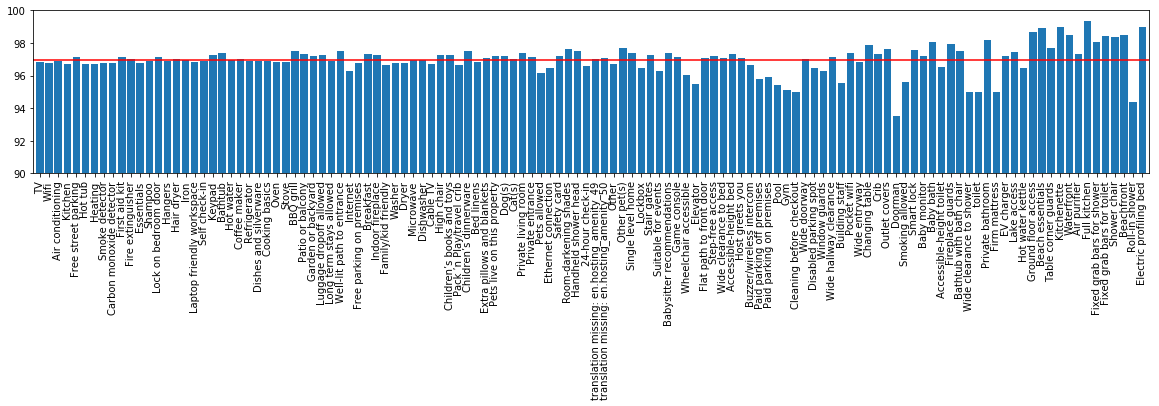

In [194]:
#just do top and bottom 25% to cut back on number of bars

x_axis = np.arange(specific_amenity_summary["Amenity"].count())

plt.figure(figsize=(20,3))

plt.bar(x_axis,specific_amenity_summary["Average Rating"])
plt.xticks(x_axis,specific_amenity_summary["Amenity"],rotation=90)

average = specific_amenity_summary["Average Rating"].mean()
plt.hlines(average,-.75,122.25,color="r")

plt.xlim(-.75,len(x_axis)-.25)
plt.ylim(90,100)

plt.show()